In [1]:
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Get data from secret file
file = open('database.txt')

lines = file.readlines()
url = lines[0].rstrip()
driver = lines[1].rstrip()
user = lines[2].rstrip()
password = lines[3].rstrip()

In [3]:
spark = SparkSession.builder.appName('CreditCardSystem').getOrCreate()

In [4]:
#Placeholder name is loan, although it doesnt want to query the name I changed to
df = spark.read.format('jdbc').options(
      url=url,
      driver=driver,
      dbtable='loan',
      user=user,
      password=password).load()

In [5]:
df = df.toPandas()

In [6]:
df.head(5)

,Application_ID,Application_Status,Credit_History,Dependents,Education,Gender,Income,Married,Property_Area,Self_Employed
0,LP001002,Y,1,0,Graduate,Male,medium,No,Urban,No
1,LP001003,N,1,1,Graduate,Male,medium,Yes,Rural,No
2,LP001005,Y,1,0,Graduate,Male,low,Yes,Urban,Yes
3,LP001006,Y,1,0,Not Graduate,Male,low,Yes,Urban,No
4,LP001008,Y,1,0,Graduate,Male,medium,No,Urban,No


In [7]:
d = df[(df['Married'] == 'Yes') & (df['Application_Status'] == 'Y')]

In [8]:
d = d.groupby(['Gender', 'Income'])['Application_ID'].count().reset_index(name='Count')

In [9]:
d

,Gender,Income,Count
0,Female,high,3
1,Female,low,10
2,Female,medium,4
3,Male,high,17
4,Male,low,119
5,Male,medium,83


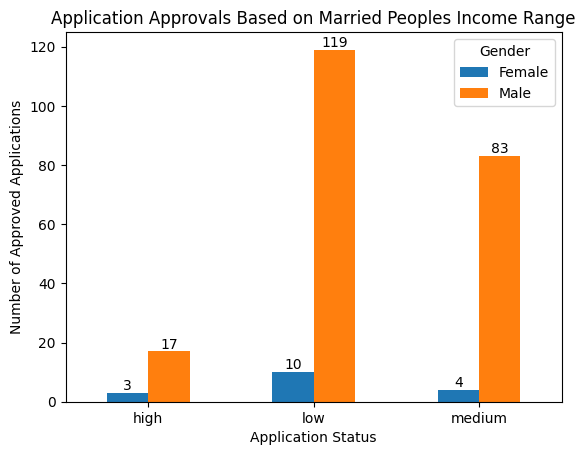

In [10]:
ax = d.pivot(index='Income', columns='Gender', values='Count').plot(kind='bar', rot='horizontal')

ax.set_title('Application Approvals Based on Married Peoples Income Range')
ax.set_xlabel('Application Status')
ax.set_ylabel('Number of Approved Applications')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.savefig('Part5-1.png')

In [11]:
f = df.groupby(['Property_Area', 'Application_Status'])['Application_ID'].count().reset_index(name='Count')

In [12]:
f

,Property_Area,Application_Status,Count
0,Rural,N,59
1,Rural,Y,90
2,Semiurban,N,44
3,Semiurban,Y,153
4,Urban,N,61
5,Urban,Y,104


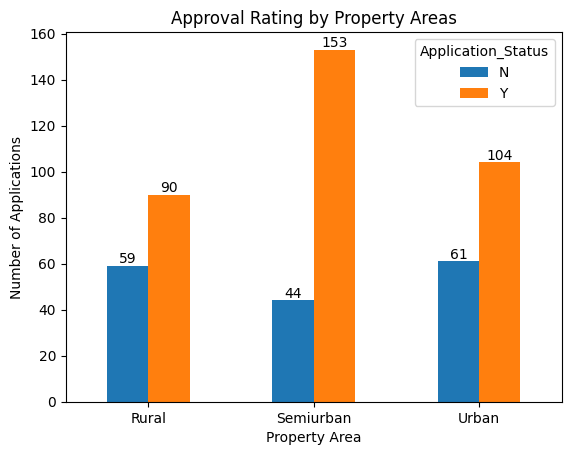

In [13]:
ax = f.pivot(index='Property_Area', columns='Application_Status', values='Count').plot(kind='bar', rot='horizontal')

ax.set_title('Approval Rating by Property Areas')
ax.set_xlabel('Property Area')
ax.set_ylabel('Number of Applications')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.savefig('Part5-2.png')